---
title: ApproxFun Modified
venue: Modules
---

## Approximation of functions via Chebyshev Polynomials and B-Splines in Julia

The Julia-package <b> ApproxFun </b> package implements Chebyshev polynomials(default) and other basis functions to approximate arbitrary functions. The dedicated package homepage can be found here: https://juliaapproximation.github.io/ApproxFun.jl/latest/

In [1]:
using ApproxFun

Define Chebychev polynomials explicitly over their natural interval by specifying coefficients:

In [ ]:
#Fully explicit construction for the first three Chebyshev polynomials over [-1,1]
chebf1=Fun(Chebyshev(Interval(-1,1)), [1,0,0]);
chebf2=Fun(Chebyshev(Interval(-1,1)), [0,1,0]);
chebf3=Fun(Chebyshev(Interval(-1,1)), [0,0,1]);

<b> ApproxFun </b> uses the natural interval [-1,1] as default for Chebyshev polynomials, so no need to specify them explicitly:

In [ ]:
#Easy construction for the first 4 Chebyshev polynomials by using default constructor
chebf1_=Fun(Chebyshev(), [1,0,0,0]);
chebf2_=Fun(Chebyshev(), [0,1,0,0]);
chebf3_=Fun(Chebyshev(),[0,0,1,0]);
chebf4_=Fun(Chebyshev(),[0,0,0,1]);

Visualizing the first 4 Chebyshev polynomials $y(x)=1, x,2x^2-1, 4x^3-3x$

In [ ]:
using Plotly, Plots, LaTeXStrings

In [ ]:
x=-1:0.05:1;


trace1 = Plotly.scatter(x=x, y=chebf1_.(x),color="red",name="T₀")
trace2 = Plotly.scatter(x=x, y=chebf2_.(x),color="blue", style="line",name="T₁")
trace3 = Plotly.scatter(x=x, y=chebf3_.(x),color="green",style="line",name="T₂")
trace4 = Plotly.scatter(x=x, y=chebf4_.(x),color="yellow",style="line",name="T₃")



layout = Layout(title="First 4 Chebyshev polynomials over interval [-1, 1]",

                   xaxis_title="x",

                   yaxis_title="y")

# Make plot
Plotly.plot([trace1, trace2,trace3,trace4],layout)

Define Chebyshe polymomials over domains other than [-1,1]:

In [ ]:
interv=Interval(2,6);
chebf1=Fun(Chebyshev(interv), [1,0,0]);
chebf2=Fun(Chebyshev(interv), [0,1,0]);
chebf3=Fun(Chebyshev(interv), [0,0,1]);

In [ ]:
x=2:0.1:6;

trace1 = Plotly.scatter(x=x, y=chebf1.(x),color="red",name="Chebyshev 0")
trace2 = Plotly.scatter(x=x, y=chebf2.(x),color="blue", name="Chebyshev 1")
trace3 = Plotly.scatter(x=x, y=chebf3.(x),color="green",name="Chebyshev 2")

layout = Layout(title="First 3 Chebyshev polynomials over interval [2, 6]",

                   xaxis_title="x",

                   yaxis_title="y")

# Make plot
Plotly.plot([trace1, trace2,trace3],layout)

<b>Explicit calculation of Chebyshev expansion coefficients</b>

Chebyshev polynomials $T_n(x)$ form a complete orthogonal basis for the space $C^1([-1,1]) $ of all continously differentiable functions over $[-1,1]$ with respect to the scalar product 
\begin{equation}
<f,g>:=\int_{-1}^1  f(x)\cdot g(x)\frac{1}{\sqrt{1-x^2}} \ dx
\end{equation}

Hence the expansion coefficients for an arbitrary function $f \in C^1([-1,1])$ can be determined as follows:

\begin{equation}
f(x)=a_0 T_0(x)+a_1 T_1(x)+ \dots + a_n T_n(x), \ \ \ a_n = \int_{-1}^1  f(x)\cdot T_n(x)\frac{1}{\sqrt{1-x^2}} \ dx
\end{equation}

If $N$ total interpolation points are given where the values for $f(x)$ are specified, then the highest order of Chebyshev expansion is $N-1$. For example, having one single point would only define the expansion coefficient for $T_0(x)=1$.

<b> Example: </b> $f(x)=e^x, $ let's interpolate $f$ with $N=1,2,3$ points to check the accuracy of Chebyshev approximations with increasing number of nodes and polynomial order.

In [3]:
unit=Interval(-1,1);# define unit interval
ChebS=Chebyshev(unit); # define function space

#adds left and right endpoints to interior Chebyshev points 
function add_cheb_endp(p)
 append!(prepend!(p,1),-1)
end

func(x)=exp.(x); # define function


p1= points(ChebS,1); # one single Chebyshev node point 
p2= points(ChebS,2); # two points
p3= points(ChebS,3); # three points
p4= points(ChebS,4); # three points

#p2_= add_cheb_endp(p2)
#p3_= add_cheb_endp(p3)
#p4_= add_cheb_endp(p4)

#Evaluate function on different Chebyshev grid points
v1=func.(p1);
v2=func.(p2);
v3=func.(p3);
v4=func.(p4);

#Approximate via Chebyshev polynomials with increasing order
func_1 = Fun(ChebS,transform(ChebS,v1));
func_2 = Fun(ChebS,transform(ChebS,v2));
func_3 = Fun(ChebS,transform(ChebS,v3));
func_4 = Fun(ChebS,transform(ChebS,v4));

#Plot results
x=-1:0.1:1

trace0 = Plotly.scatter(x=x, y=func.(x),mode="lines",name="Exact function")
trace1 = Plotly.scatter(x=x, y=func_1.(x),mode="lines",name="Approximation with 1 point")
trace2 = Plotly.scatter(x=x, y=func_2.(x),mode="markers", name="Approximation with 2 points")
trace3 = Plotly.scatter(x=x, y=func_3.(x),mode="markers",name="Approximation with 3 points")
trace4 = Plotly.scatter(x=x, y=func_4.(x),mode="markers",name="Approximation with 4 points")

layout = Layout(title=" Approximation via interpolation with different number of Chebyshev node points",

                   xaxis_title="x",

                   yaxis_title="y")

# Make plot
Plotly.plot([trace0, trace1, trace2,trace3,trace4 ],layout)


data: [
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields mode, name, type, x, and y"
]

layout: "layout with fields margin, template, title, xaxis, and yaxis"

Compute the maximal error between Chebyshev approximation and exact function among all interplated points:

In [ ]:
err=findmax(abs.(func_4.(x)-func.(x)));
#returns both maximal error and its location in x

print("The maximal error between Chebyshev approximation with four points and exact curve among all ", length(x), 
    " interpolated points is ",  err[1], " and is assumed at the point x = ", x[err[2]])

We can just let the ApproxFun package compute the approximation automatically to within machine accuracy:

In [ ]:
func_approx=Fun(exp); # [-1,1] is the default interval if nothing is specified
func_approx_=Fun(exp,1..4); # Specify interval of function

In [ ]:
x=-1:0.1:1
x_=1:0.1:1.5;

Plots.plot(x,func.(x),label=L"Exact function $f(x)=e^x$",lc=:black,lw=2,ls=:solid )
Plots.plot!(x,func_approx.(x), label="Automatic Approximation over [-1,1]",lc=:green,markers=:square,lw=2,ls=:dash )

Plots.plot!(x_,func_approx_.(x_), label="Automatic Approximation over [1,1.5]",lc=:blue,markers=:circle,lw=2,ls=:dot )

Plots.title!(L"Approximation of $y=e^x$ with Chebyshev polynomials")
xlabel!(L"x")
ylabel!(L"y")

<b> Evaluating definite integrals </b>

In [ ]:
DI = DefiniteIntegral(Chebyshev(Interval(-1,1)))

In [ ]:
weight(x)=1 ./sqrt(1-x.^2)

In [ ]:
chebyshev0(x)=1
chebyshev1(x)=x
chebyshev2(x)=2*x^2-1
chebyshev3(x)=4*x^3-3x

Calculate $I1=\int_{-1}^1 1\cdot dx, I2= \int_{-1}^1 x\  dx $

In [ ]:
DI*Fun(chebyshev0)


In [ ]:
DI*Fun(chebyshev1)

Check orthogonality of Chebyshev polynomials using scalar products without and with weights:

In [ ]:
# scalar product without weight function
test1(x)=chebyshev0(x)*chebyshev2(x);
DI*Fun(test1)

In [ ]:
test2(x)=chebyshev1(x)*chebyshev3(x);
DI*Fun(test2)

In [ ]:
# scalar product with weight function
test1_(x)=chebyshev0(x)*chebyshev2(x)*weight(x);
DI*Fun(test1_)

In [ ]:
test2_(x)=chebyshev1(x)*chebyshev3(x)*weight(x);
DI*Fun(test2_)

# Piecewise Interpolation via B-Splines

The julia package for B-Splines can be obtained here: https://docs.juliahub.com/BSplines/4pIhL/0.2.3/

In [1]:
using BSplines,Plotly,Plots

WebIO._IJuliaInit()

Constructing basis with given order and interval:

In [9]:
margin=0.1e-9
startp=-3-margin
endp=3+margin

Npoints=4
h=(endp-startp)/(Npoints+1)
spline_points=startp:h:endp
spline_order = 3
spline_basis = BSplineBasis(spline_order, spline_points)

7-element BSplineBasis{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}:
 order: 3
 breakpoints: -3.0000000001:1.20000000004:3.0000000001

Plot all spline basis functions:

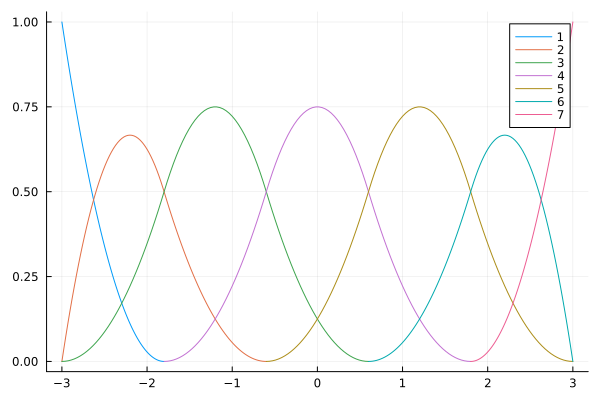

In [3]:
Plots.plot(spline_basis)


Approximate any given function:

In [5]:
f_sin(x)=cos(x^2)

f_sin (generic function with 1 method)

In [10]:
spl_approx = approximate(f_sin, spline_basis)

Spline{BSplineBasis{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}, Vector{Float64}}:
 basis: 7-element BSplineBasis{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}:
  order: 3
  breakpoints: -3.0000000001:1.20000000004:3.0000000001
 coeffs: [-0.91113, 1.82507, -0.373238, 1.45775, -0.373238, 1.82507, -0.91113]

Plot approximation with exact function:

In [39]:
spline_points=-3:0.4:3
spline_order = 3
spline_basis = BSplineBasis(spline_order, spline_points)

spl_approx = approximate(f_sin, spline_basis)

x=-3:0.01:3

trace0 = Plotly.scatter(x=x, y=f_sin.(x),mode="lines", name="Exact function value")
trace1 = Plotly.scatter(x=spline_points, y=f_sin.(spline_points),mode="markers", name="Function at knots", 
    marker=attr(color="LightSkyBlue",size=10))
trace2 = Plotly.scatter(x=x, y=spl_approx.(x),mode="markers", name="B-Spline approximation",
    marker=attr(color="Green",size=2))

layout = Layout(title=" Approximation via B-Splines with equidistant  knot points",

                   xaxis_title="x",

                   yaxis_title="y")

# Make plot
Plotly.plot([trace0, trace1,trace2],layout)

data: [
  "scatter with fields mode, name, type, x, and y",
  "scatter with fields marker, mode, name, type, x, and y",
  "scatter with fields marker, mode, name, type, x, and y"
]

layout: "layout with fields margin, template, title, xaxis, and yaxis"

Get maximal approximation error on all interpolated points:

In [ ]:
err=findmax(abs.(spl_approx.(x)-f_sin.(x)));
#returns both maximal error and its location in x

print("The maximal error between B-Spline and exact curve among all ", length(x), 
    " interpolated points is ",  err[1], " and is assumed at the point x = ", x[err[2]])

# In-class Exercise: Calculate accuracy of polynomial approximations

<b> Your Task: </b> For the function $f(x)=e^x$ on the interval $[-1,1]$, approximate $f(x)$ with Chebyshev polynomials supported on $N=1,2,\dots,10$ internal Chebyshev points. For each $N$, compute the maximal approximation error $\epsilon(N)$ for 1001 equidistant points within $[-1,1]$. Plot $\epsilon(N)$ as a function of $N$. Repeat this for B-Spline approximation, where $N$ now stands for the number of knots. Compare the error function $\epsilon(N)$ for both types of approximations.

<b> Exploration: </b> Repeat the above task for the function $g(x)=\cos(10x^2)$, and compare its approximation error curve with that of $f(x)$. Which function is harder to approximate?